<a href="" target="_blank">
  <button style="background-color:#0072ce; color:white; padding:0.6em 1.2em; font-size:1rem; border:none; border-radius:6px; margin-top:1em;">
    🚀 Launch this notebook in JupyterLab
  </button>
</a>

### Introduction

In this section, we will discover how to search and access Sentienl-1 GRD data through EOPF Zarr samples services and how the SAR data is structured inside the groups and subgroups of a `.zarr` product.




### What we will learn


-  🗂️ How a Sentinel-1 GRD `.zarr` product is structered?
- 🔎 How to visualize some of the variables inside the `.zarr` product?
- 🚀 The practical meaning of some of these Sentinel-1 GRD variables

### Prerequisites

This tutorial uses a re-processed sample dataset from the [EOPF Sentinel Zarr Samples Service STAC API](https://stac.browser.user.eopf.eodc.eu/).<br>

We will be using the **Sentinel-1 GRD** collection is available for direct access [here](https://stac.browser.user.eopf.eodc.eu/collections/sentinel-1-l1-grd). 

The selected `.zarr` product from this collection is an item that corresponds to the 08th of May 2017, that visualises the Italian southern area:

* `S1A_IW_GRDH_1SDV_20170508T164830_20170508T164855_016493_01B54C_8604`.

Since this notebook depends on additional packages (beyond the base environment), we will install all the extra dependencies defined in the project’s `pyproject.toml`. The command below ensures the environment is synchronized with all extras included:


`uv sync --all-extras`


(run this command on your terminal to get all the extra dependencies)

<hr>

#### Import libraries

In [1]:
import xarray as xr # The basic package to deal with data arrays
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # For the orbit 3D plotting

#### Helper functions

##### `print_gen_structure`
This function helps us to retrieve and visualise the names for each of the stored groups inside a `.zarr` product. As an output, it will print a general overview of elements inside the `zarr`.

In [2]:
def print_gen_structure(node, indent=""):
    print(f"{indent}{node.name}")     #allows us access each node
    for child_name, child_node in node.children.items(): #loops inside the selected nodes to extract naming
        print_gen_structure(child_node, indent + "  ") # prints the name of the selected nodes

<hr>

## Sentinel-1 GRD structure

### Opening the Zarr groups and subgroups

We start by unwrapping Sentinel-1 GRD `.zarr` products. You can use the xarray functions `open_datatree()`and `open_dataset()` to do this. 

Let's keep in mind the following:
- set `engine = "zarr"`, specifically designed for the enoding chosen for the EOPF by ESA. 
- `chunks = {}`, to keep the original chunking size defined in the `.zarr`file metadata

In [3]:
productID = "S1A_IW_GRDH_1SDV_20170508T164830_20170508T164855_016493_01B54C_8604"
url = f"https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_b716/{productID}.zarr"

dt = xr.open_datatree(
    url, 
    engine='zarr', 
    chunks={}
)

print_gen_structure(dt, indent="") # So we can visualize the data structure easily

/opt/conda/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


None
  S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH
    conditions
      antenna_pattern
      attitude
      azimuth_fm_rate
      coordinate_conversion
      doppler_centroid
      gcp
      orbit
      reference_replica
      replica
      terrain_height
    measurements
    quality
      calibration
      noise
      noise_range
  S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VV
    conditions
      antenna_pattern
      attitude
      azimuth_fm_rate
      coordinate_conversion
      doppler_centroid
      gcp
      orbit
      reference_replica
      replica
      terrain_height
    measurements
    quality
      calibration
      noise
      noise_range


As we can see, Sentinel-1 GRD data is organised in a slightly different way compared to Sentinel-2 and Sentinel 3.

There are two main groups with the same subgroups, which correspond to the polarisation information. To identify each polarization you need to check the last two letters of each group. 

For example:
* `S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH` corresponds to the VH polarization, and
* `S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VV` corresponds to the VV polarization.

Each polarization group contains the `conditions`, `measurements` and `quality` subgroups. We can list all the groups for the VH polarisation calling `.groups`.

In [4]:
vh = dt.S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH.groups
vh

('/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/measurements',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/quality',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/antenna_pattern',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/attitude',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/azimuth_fm_rate',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/coordinate_conversion',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/doppler_centroid',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/gcp',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/orbit',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/reference_replica',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/replica',
 '/S01SIWGRD_20170508T164

### Browsing information inside Zarr

Now that we know how to access each polarisation group, we can check where some of the relevant information is stored. These variables will help us visualise results.

For example, to access the `measurements` subgroup, we can used the `.open_dataset()` function. Important is to specify the group we are interested in with the help of the `group` keyword argument.

In [6]:
measurements = xr.open_dataset(
    url,
    engine="zarr",
    group="S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/measurements",
    chunks={}
)
measurements

<xarray.Dataset> Size: 877MB
Dimensions:       (azimuth_time: 16694, ground_range: 26239)
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 134kB 2017-05-08T16:48:30.467...
  * ground_range  (ground_range) float64 210kB 0.0 10.0 ... 2.624e+05 2.624e+05
    line          (azimuth_time) int64 134kB dask.array<chunksize=(16694,), meta=np.ndarray>
    pixel         (ground_range) int64 210kB dask.array<chunksize=(26239,), meta=np.ndarray>
Data variables:
    grd           (azimuth_time, ground_range) uint16 876MB dask.array<chunksize=(2557, 26239), meta=np.ndarray>

Antoher way to open a subgroup is converting the information showed on the data tree to a data set information, using `.to_dataset()` function.

In [7]:
measurements2 = dt["S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/measurements"].to_dataset()
if measurements == measurements2:
    print("Yes, it's the same!")

measurements2

Yes, it's the same!


<xarray.Dataset> Size: 877MB
Dimensions:       (azimuth_time: 16694, ground_range: 26239)
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 134kB 2017-05-08T16:48:30.467...
  * ground_range  (ground_range) float64 210kB 0.0 10.0 ... 2.624e+05 2.624e+05
    line          (azimuth_time) int64 134kB dask.array<chunksize=(16694,), meta=np.ndarray>
    pixel         (ground_range) int64 210kB dask.array<chunksize=(26239,), meta=np.ndarray>
Data variables:
    grd           (azimuth_time, ground_range) uint16 876MB dask.array<chunksize=(2557, 26239), meta=np.ndarray>

## Understanding and visualizing SAR products

We can do the same for other subgroups that contain SAR information.

### Ground Range Detected

A Ground Range Detected (GRD) product shows us the amplitude of a SAR image. The amplitude reflects the intensity of the radar backscatter, which is the same thing as saying that the amplitude shows how much energy is reflected or absorbed by the surface.

Because the `grd` variable is very heavy for plotting, we need to decimate it. We will use the dataset created before for measurements to access the `grd` variable.

In [8]:
grd = measurements.grd
grd_decimated = grd.isel(
    azimuth_time=slice(None, None, 10), ground_range=slice(None, None, 10)
)

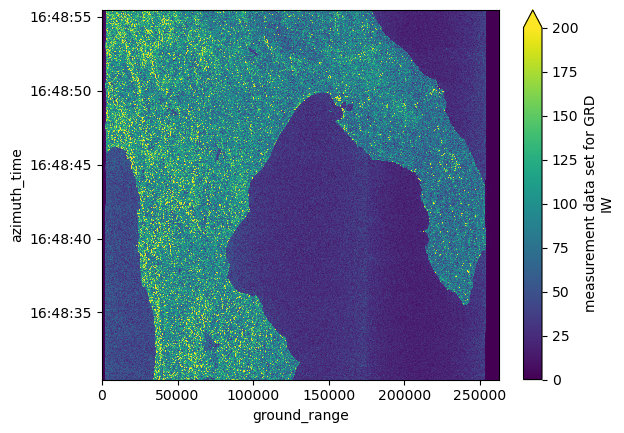

In [9]:
grd_decimated.plot(vmax=200)
plt.show()

### Sigma Nought and Digital Number

We can find the `calibration` subgroup inside the `quality` subgroup. It is valuable to take a look at it, as it provides data concerning:

- `sigma_nought`or `backscatter coefficient`: It represents the strength of the radar signal backscattered (or reflected back) from a target on Earth's surface. See it as how much radar energy is reflected back toward the satellite from a unit area on the ground. This information is rescaled to decibels dB in a common workflow.
- `dn`: A digital number representing the raw intensity data measured by the SAR sensor.

In [10]:
calibration = dt["S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/quality/calibration"].to_dataset()
calibration

<xarray.Dataset> Size: 292kB
Dimensions:       (azimuth_time: 27, ground_range: 657)
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 216B 2017-05-08T16:48:30.4679...
  * ground_range  (ground_range) float64 5kB 0.0 6.677e+06 ... 4.38e+09
    line          (azimuth_time) uint32 108B dask.array<chunksize=(27,), meta=np.ndarray>
    pixel         (ground_range) uint32 3kB dask.array<chunksize=(657,), meta=np.ndarray>
Data variables:
    beta_nought   (azimuth_time, ground_range) float32 71kB dask.array<chunksize=(27, 657), meta=np.ndarray>
    dn            (azimuth_time, ground_range) float32 71kB dask.array<chunksize=(27, 657), meta=np.ndarray>
    gamma         (azimuth_time, ground_range) float32 71kB dask.array<chunksize=(27, 657), meta=np.ndarray>
    sigma_nought  (azimuth_time, ground_range) float32 71kB dask.array<chunksize=(27, 657), meta=np.ndarray>

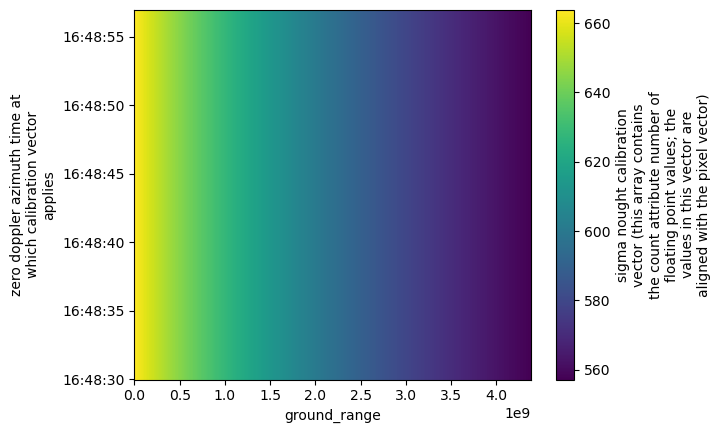

In [11]:
calibration.sigma_nought.plot()
plt.show()

### GCP

The **gcp** subgroup inside `conditions` is also important. GCP stands for ground control points which are known and precise geolocated references on the Earth's surface. They can be used later to georeference the GRD image. 

In [12]:
gcp = dt["S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/gcp"].to_dataset()
gcp

<xarray.Dataset> Size: 12kB
Dimensions:               (azimuth_time: 10, ground_range: 21)
Coordinates:
  * azimuth_time          (azimuth_time) datetime64[ns] 80B 2017-05-08T16:48:...
  * ground_range          (ground_range) float64 168B 0.0 ... 2.624e+05
    line                  (azimuth_time) uint32 40B dask.array<chunksize=(10,), meta=np.ndarray>
    pixel                 (ground_range) uint32 84B dask.array<chunksize=(21,), meta=np.ndarray>
Data variables:
    azimuth_time_gcp      (azimuth_time, ground_range) datetime64[ns] 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    elevation_angle       (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    height                (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    incidence_angle       (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    latitude              (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    longitude             (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    slant_range_time_gcp  (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>

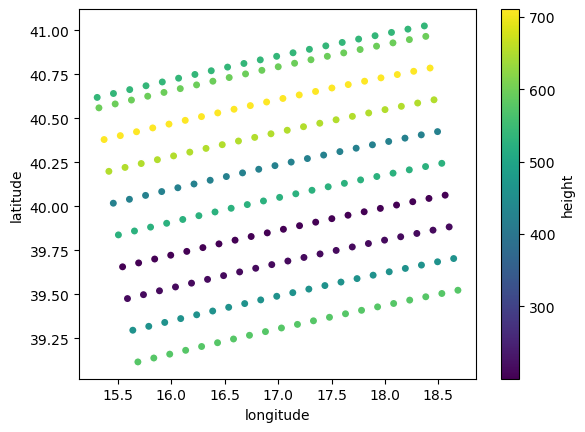

In [13]:
gcp.plot.scatter(x="longitude", y="latitude", hue="height")
plt.show()

### Orbit

**orbit** subgroup inside `conditions` is a variable that reflects how the orbital trajectory of the sattelite behaved during the flight. 

In [14]:
orbit = dt["S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/orbit"].to_dataset()
orbit

<xarray.Dataset> Size: 952B
Dimensions:       (azimuth_time: 17, axis: 3)
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 136B 2017-05-08T16:47:24.0541...
Dimensions without coordinates: axis
Data variables:
    position      (azimuth_time, axis) float64 408B dask.array<chunksize=(17, 3), meta=np.ndarray>
    velocity      (azimuth_time, axis) float64 408B dask.array<chunksize=(17, 3), meta=np.ndarray>

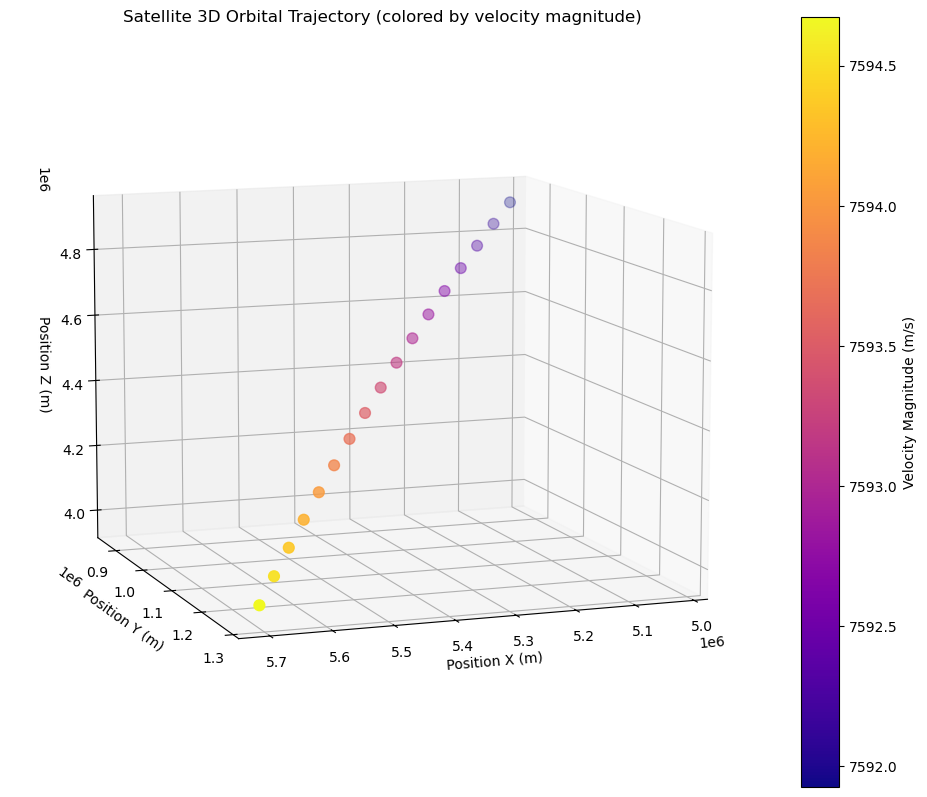

In [15]:
# Extract position components (X, Y, Z coordinates in space)
pos_x = orbit.position[:, 0]
pos_y = orbit.position[:, 1] 
pos_z = orbit.position[:, 2]

# Extract velocity components and calculate magnitude
vel_x = orbit.velocity[:, 0]
vel_y = orbit.velocity[:, 1]
vel_z = orbit.velocity[:, 2]
velocity_magnitude = np.sqrt(vel_x**2 + vel_y**2 + vel_z**2)

# Convert time to numeric for potential use in point sizing
time_numeric = (orbit.azimuth_time - orbit.azimuth_time[0]) / np.timedelta64(1, 's')

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot: X, Y, Z positions colored by velocity magnitude
scatter = ax.scatter(pos_x, pos_y, pos_z,
                    c=velocity_magnitude, cmap='plasma', s=60)

ax.set_xlabel('Position X (m)')
ax.set_ylabel('Position Y (m)')
ax.set_zlabel('Position Z (m)')
plt.colorbar(scatter, label='Velocity Magnitude (m/s)')
ax.set_title('Satellite 3D Orbital Trajectory (colored by velocity magnitude)')

# Set a good viewing angle
ax.view_init(elev=10, azim=70)
plt.show()

<hr>

## 💪 Now it is your turn

With everything we have learnt so far, you are now able to explore **Sentinel-1 GRD** items and plot their visuals.

### Task 1: Reproduce the workflow with your dataset
Define an area of interest, search and filter the **Sentinel-1 GRD**  collection for the area where you live. Explore the data tree, and the structure of one of the items. 

### Task 2: Explore other variables
We've learnt how to look, explore and plot some specific variables inside the `.zarr` subgroups, but there are many more. Try to explore and understand what are some other variables, like `terrain_height` our `noise_range`.

### Task 3: Play with the image plotting
There are many ways to plot an image. Try to play with the variables you are plotting, changing the axis coordinates, maximum values shown or hue values.



## Conclusion

This tutorial provided the basics to explore and understand how the **Sentinel-1 GRD** is structured inside the `.zarr` format and what to expect to find inside of it.

## What's next?

The next [section](24_S1_basic_operations.ipynb) shows how to perform basic operations on `.zarr` Sentinel-1 GRD data, using some of the variables we have discovered in this section.